### Install and Imports

In [1]:
!pip install torch torchvision torchaudio --index-url https://download.pytorch.org/whl/cu117
!git clone https://github.cofm/ultralytics/yolov5
!cd yolov5 & pip install -r requirements.txt

Looking in indexes: https://download.pytorch.org/whl/cu117


fatal: destination path 'yolov5' already exists and is not an empty directory.


In [2]:
import torch
from matplotlib import pyplot as plt
import numpy as np
import cv2

### Model

In [3]:
model = torch.hub.load("ultralytics/yolov5","yolov5s")

Using cache found in C:\Users\Himanshu Singh/.cache\torch\hub\ultralytics_yolov5_master
YOLOv5  2023-5-28 Python-3.10.4 torch-2.0.0+cpu CPU

Fusing layers... 
YOLOv5s summary: 213 layers, 7225885 parameters, 0 gradients
Adding AutoShape... 


In [4]:
 img = "https://ultralytics.com/images/zidane.jpg"
results = model(img)
results.print() 

image 1/1: 720x1280 2 persons, 2 ties
Speed: 1185.5ms pre-process, 424.3ms inference, 0.0ms NMS per image at shape (1, 3, 384, 640)


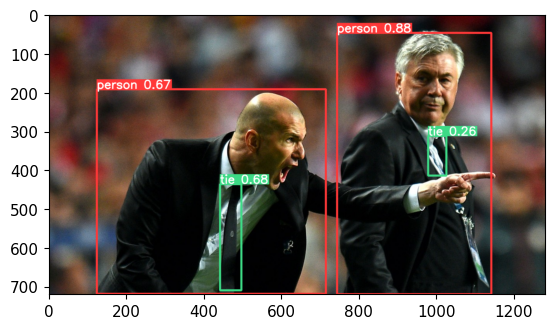

In [5]:
%matplotlib inline
plt.imshow(np.squeeze(results.render()))
plt.show()

In [6]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    results = model(frame)
    
    cv2.imshow("YOLO", np.squeeze(results.render())) 
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()

### Training Model

In [7]:
import uuid
import os
import time
import cv2

In [8]:
IMAGES_PATH = os.path.join('data','images')
labels = ['awake', 'drowsy']
number_imgs = 20

In [9]:
!git clone https://github.com/heartexlabs/labelImg

fatal: destination path 'labelImg' already exists and is not an empty directory.


In [9]:
cap = cv2.VideoCapture(0)
for label in labels:
    print(f"Collecting Images for {label}")
    time.sleep(5)
    
    for img_num in range(number_imgs):
        print(f"collecting images for {label}, image number{img_num}")
        ref, frame = cap.read()
        
        imgname = os.path.join(IMAGES_PATH,label+'.'+str(uuid.uuid1())+'.jpg')
        cv2.imwrite(imgname,frame)
        cv2.imshow('image_collection',frame)
        time.sleep(2)
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
cap.release()
cv2.destroyAllWindows()

collecting images for awake, image number0
collecting images for awake, image number1
collecting images for awake, image number2
collecting images for awake, image number3
collecting images for awake, image number4
collecting images for awake, image number5
collecting images for awake, image number6
collecting images for awake, image number7
collecting images for awake, image number8
collecting images for awake, image number9
collecting images for awake, image number10
collecting images for awake, image number11
collecting images for awake, image number12
collecting images for awake, image number13
collecting images for awake, image number14
collecting images for awake, image number15
collecting images for awake, image number16
collecting images for awake, image number17
collecting images for awake, image number18
collecting images for awake, image number19
collecting images for drowsy, image number0
collecting images for drowsy, image number1
collecting images for drowsy, image number

In [10]:
!pip install pyqt5 lxml --upgrade
!cd labelImg && pyrcc5 -o libs/resources.py resources.qrc

In [ ]:
!cd yolov5 && python train.py --img 320 --batch 16 --epochs 500 --data dataset.yml --weights yolov5s.pt --workers 2

In [ ]:
model = torch.hub.load('ultralytics/yolov5', 'custom', path='yolov5/runs/train/exp15/weights/last.pt', force_reload=True)

In [ ]:
img = os.path.join('data', 'images', 'awake.c9a24d48-e1f6-11eb-bbef-5cf3709bbcc6.jpg')
results = model(img)
results.print()


%matplotlib inline 
plt.imshow(np.squeeze(results.render()))
plt.show()

In [ ]:
cap = cv2.VideoCapture(0)
while cap.isOpened():
    ret, frame = cap.read()
    
    # Make detections 
    results = model(frame)
    
    cv2.imshow('YOLO', np.squeeze(results.render()))
    
    if cv2.waitKey(10) & 0xFF == ord('q'):
        break
cap.release()
cv2.destroyAllWindows()